# Report structure
0. Import libraries
1. Import data

# 0. Import libraries


In [16]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

# 1. Import data

In [19]:
taxi_feb_2019 = pd.read_parquet("data/yellow_tripdata_2019-02.parquet")
taxi_data = pd.concat([taxi_feb_2019])

In [20]:
print(taxi_data.shape)
taxi_data.head()

(7049370, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1.0,2.1,1.0,N,48,234,1,9.0,0.5,0.5,2.0,0.0,0.3,12.3,0.0,None
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1.0,9.8,1.0,N,230,93,2,32.0,0.5,0.5,0.0,0.0,0.3,33.3,0.0,None
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1.0,0.0,1.0,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0,None
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1.0,0.8,1.0,N,95,95,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0,None
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1.0,0.8,1.0,N,140,263,2,5.0,0.5,0.5,0.0,0.0,0.3,6.3,0.0,None


# 2. Data exploration

In [21]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [23]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type',
       'total_amount']]

In [24]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-02-01 00:59:04,2019-02-01 01:07:27,1.0,2.1,1.0,48,234,1,12.3
1,2019-02-01 00:33:09,2019-02-01 01:03:58,1.0,9.8,1.0,230,93,2,33.3
2,2019-02-01 00:09:03,2019-02-01 00:09:16,1.0,0.0,1.0,145,145,2,3.8
3,2019-02-01 00:45:38,2019-02-01 00:51:10,1.0,0.8,1.0,95,95,2,6.8
4,2019-02-01 00:25:30,2019-02-01 00:28:14,1.0,0.8,1.0,140,263,2,6.3


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

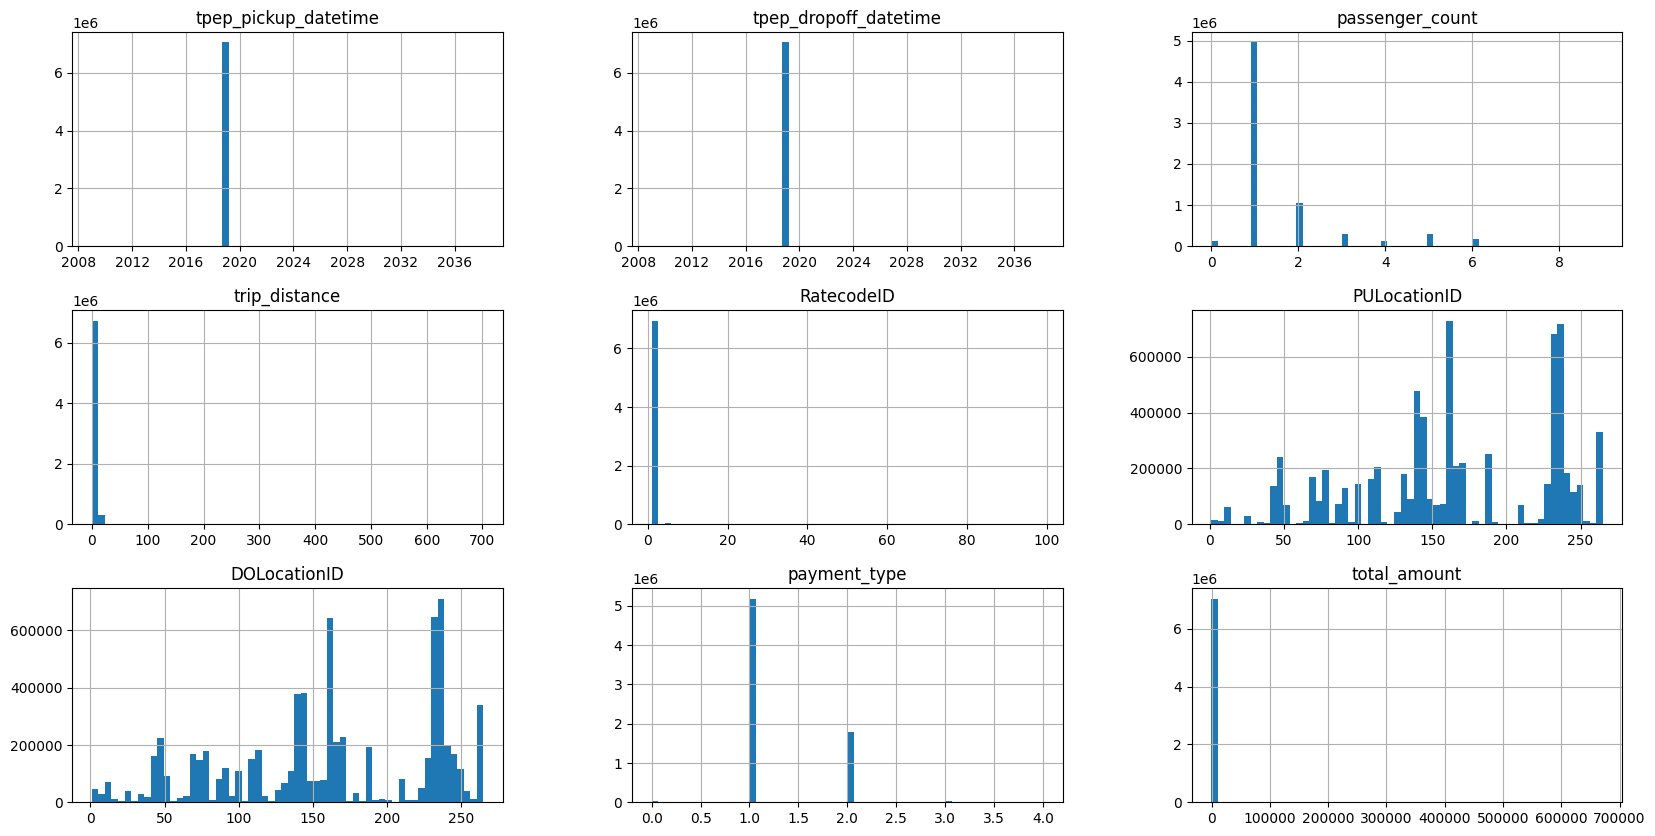

In [25]:
taxi_data.hist(figsize=(20,10), bins=60)

In [26]:
taxi_data["RatecodeID"].value_counts()

RatecodeID
1.0     6792297
2.0      155984
5.0       53857
3.0       12583
4.0        4762
99.0        184
6.0          40
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

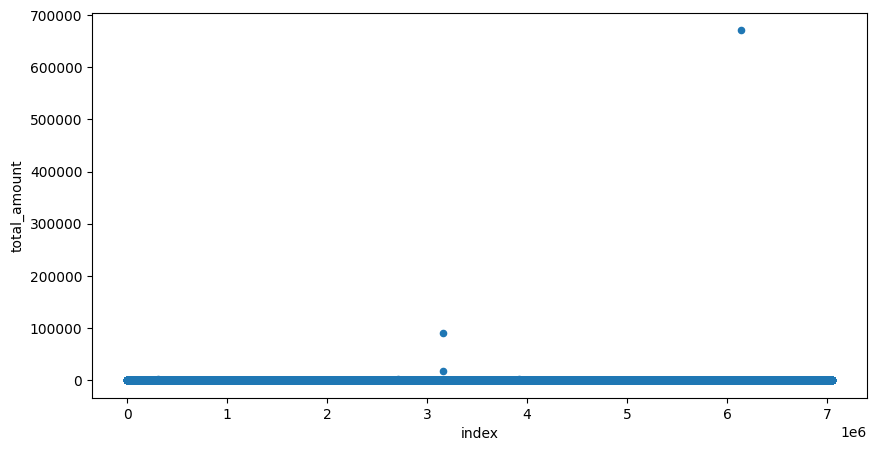

In [30]:
taxi_data.reset_index().plot(kind="scatter", y = "total_amount", x = "index", figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

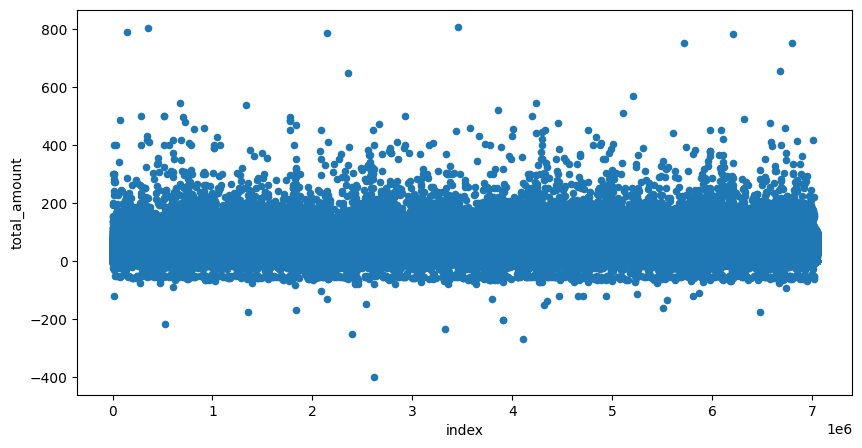

In [31]:
taxi_data[taxi_data["total_amount"]<1000].reset_index().plot(kind="scatter", y = "total_amount", x = "index", figsize=(10,5))

There are two thing I have to deal with - very high values and negative values in total amount. First, let's look at negative values.

Let's take a closer look at the range of negative values. 

(9475, 9)


<Axes: xlabel='index', ylabel='total_amount'>

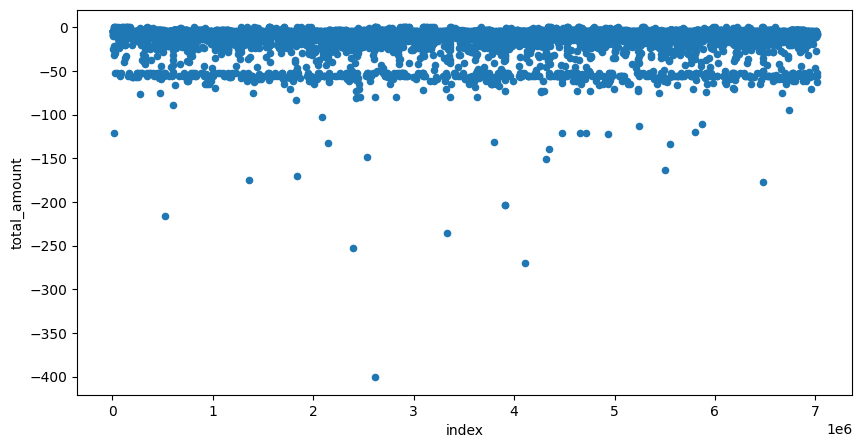

In [33]:
print(taxi_data[taxi_data["total_amount"]<0].shape)
taxi_data[taxi_data["total_amount"]<0].reset_index().plot(kind="scatter", y="total_amount", x="index", figsize=(10,5))

In [34]:
taxi_data[taxi_data["total_amount"]<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
1801,2019-02-01 00:16:34,2019-02-01 00:16:49,3.0,0.00,1.0,226,226,4,-3.8
2111,2019-02-01 00:37:22,2019-02-01 00:37:25,4.0,0.00,1.0,264,132,3,-3.8
3416,2019-02-01 00:43:08,2019-02-01 01:13:15,2.0,5.71,1.0,161,82,2,-24.8
4807,2019-02-01 00:14:00,2019-02-01 00:15:35,1.0,0.20,1.0,114,114,4,-4.3
5419,2019-02-01 00:47:13,2019-02-01 00:50:58,1.0,0.72,1.0,137,170,3,-5.8


In [36]:
taxi_data[taxi_data["total_amount"]<0]["payment_type"].value_counts()

payment_type
3    5393
4    3602
2     478
1       2
Name: count, dtype: int64

<Axes: >

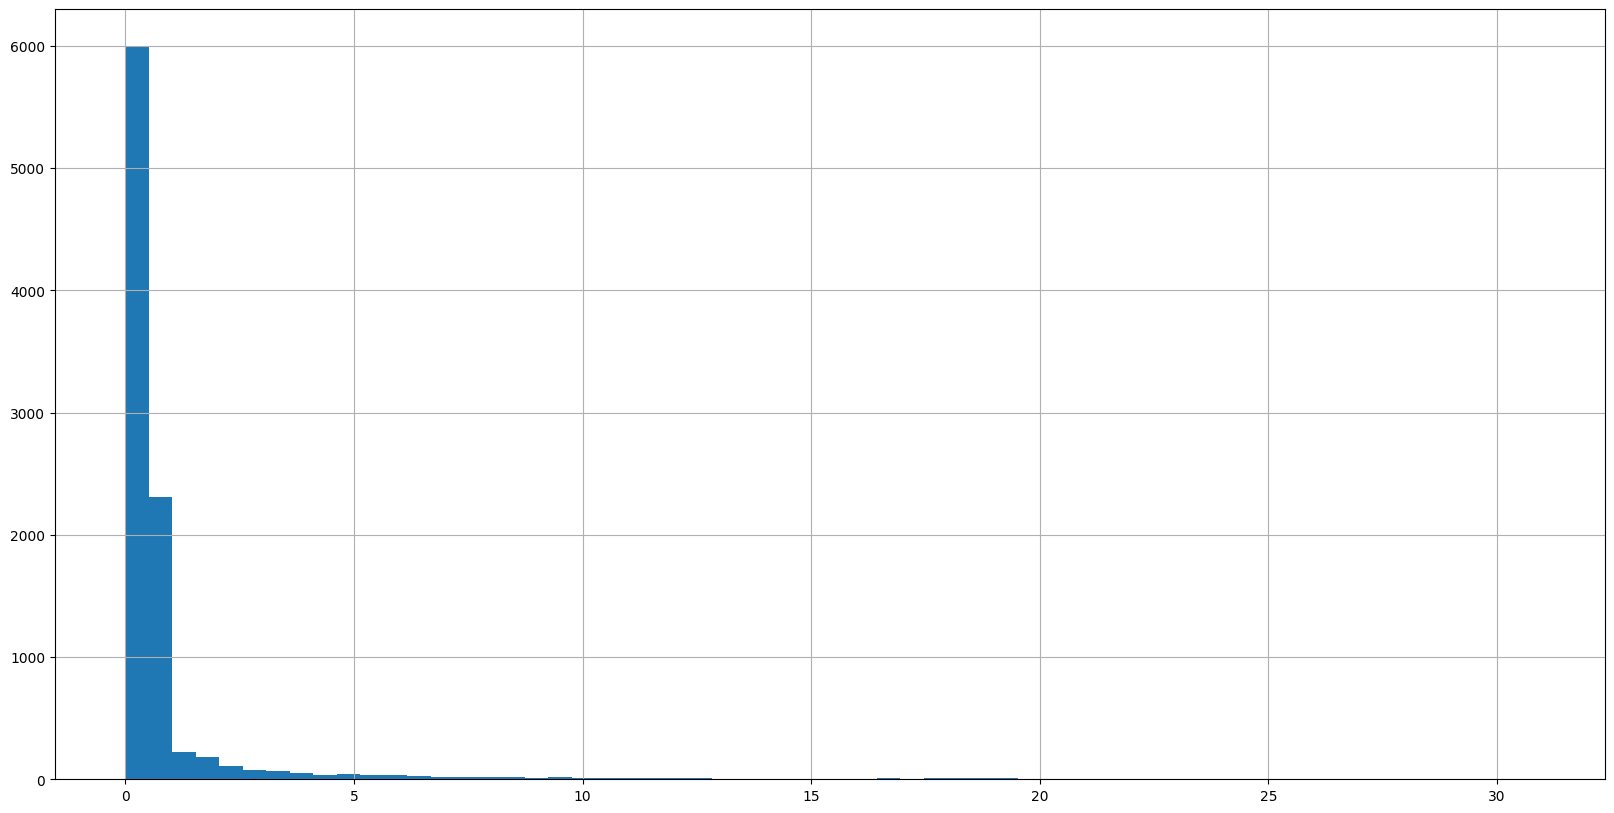

In [37]:
taxi_data[taxi_data["total_amount"]<0]["trip_distance"].hist(figsize=(20,10), bins=60)

As I looked more into the negative values I decided to delete them. As I can see from the Payment type, there are mostly two types - 3 - No charge and 4 - Dispute. Then nearly 6000 trips had almost no distance. So we can asume that those values were most likely errors or maybe the person had changed its mind.

Also there is no need to keep track of zero total amount. Those trips are not useful for us, so let's see how many of them I have. Maybe I will delete them too.

In [40]:
print(taxi_data[taxi_data["total_amount"]==0].shape)
taxi_data[taxi_data["total_amount"]==0].head()

(1777, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
310,2019-01-31 23:59:28,2019-02-01 00:12:09,6.0,2.81,1.0,163,43,2,0.0
7125,2019-02-01 00:20:44,2019-02-01 00:21:30,1.0,0.00,1.0,193,193,1,0.0
7126,2019-02-01 00:09:57,2019-02-01 00:09:57,1.0,0.00,1.0,264,193,2,0.0
11196,2019-02-01 01:47:08,2019-02-01 01:47:53,1.0,0.00,1.0,193,193,1,0.0
11197,2019-02-01 01:03:18,2019-02-01 01:03:20,1.0,0.00,1.0,264,193,1,0.0


trip_distance
0.00     1241
0.10       21
0.01       20
0.02       14
0.03       11
         ... 
1.64        1
0.47        1
16.79       1
15.23       1
17.63       1
Name: count, Length: 348, dtype: int64

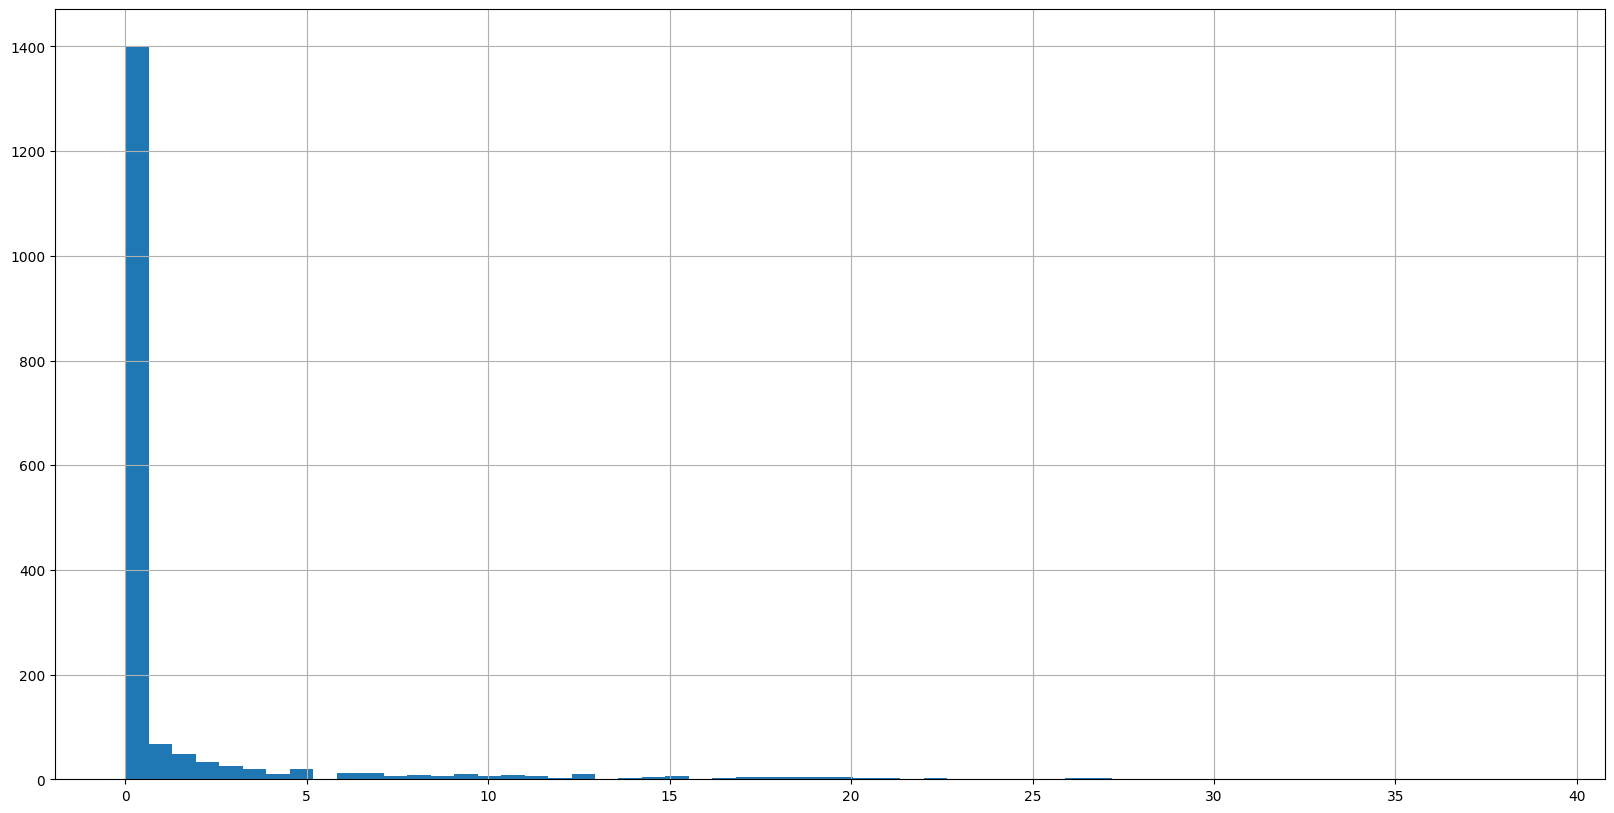

In [45]:
taxi_data[taxi_data["total_amount"]==0]["trip_distance"].hist(figsize=(20,10), bins=60)
taxi_data[taxi_data["total_amount"]==0]["trip_distance"].value_counts()

So, there are only 1.777 values with total amount of zero and most of them have zero distance. I feel free to delete these. 

And now let's look at the very high values.

<Axes: xlabel='index', ylabel='total_amount'>

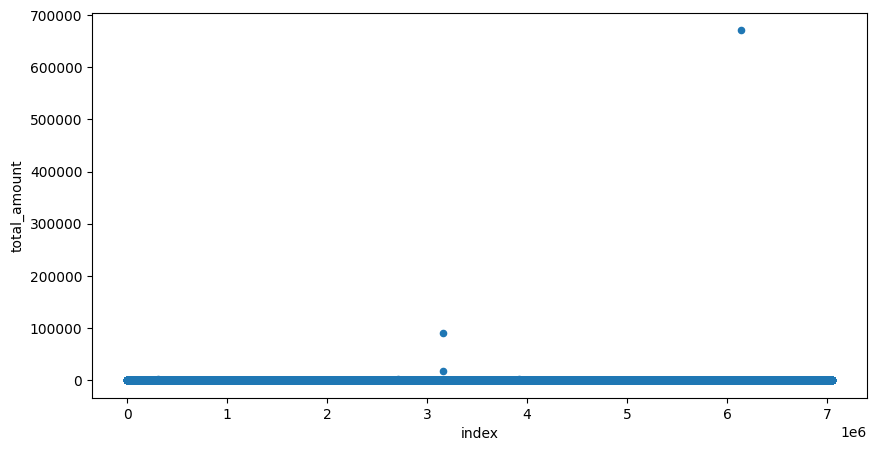

In [46]:
taxi_data.reset_index().plot(kind="scatter", y = "total_amount", x = "index", figsize=(10,5))

In [51]:
taxi_data[taxi_data["total_amount"]>200].shape

(1035, 9)

There are only 1.035 records of total amount higher than 200 dollars. So we can agree to cut from 200 dollars level. 

In [52]:
taxi_data["total_amount"].mean()

np.float64(18.689249017997387)

The mean of total amount is 18.69 dollars.

# 3. Data cleaning

In [53]:
taxi_data_filtered=taxi_data[(taxi_data["total_amount"]>0)&(taxi_data["total_amount"]<200)]

In [55]:
print(taxi_data.shape)
print(taxi_data_filtered.shape)

(7049370, 9)
(7037079, 9)


So after deleting values I decided on to, I have lost 12.291 records.

And now let's see if there are any null values.

In [56]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          29421
trip_distance                0
RatecodeID               29421
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64